<a href="https://colab.research.google.com/github/frendev/Machine_Learning_in_Python/blob/master/Housing_Price_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing boston dataset
from sklearn.datasets import load_boston

In [0]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
ds=load_boston()
print(ds.keys())

print('Features of our dataset-',(ds.feature_names))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Features of our dataset- ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [85]:
df=pd.DataFrame(ds.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Here we can see that our dataframe's columns does not have names but indexes,so we can convert those indexes to names as we have feature_names.

In [86]:
df.columns=ds.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now let's do some Exploratory Data Analysis(EDA)


In [87]:
#df.info() gives us information about the dataframe including the data types of each column and memory usage of the entire data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [88]:
#df.describe() gives us the information about columns i.e maximum of the column, mean of the column, etc..
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [89]:
#the target variable is not included in the 'data' key. However there is a key called as 'target' which is our dependent variable.
#lets look at the shape of both the variables i.e 'data' and 'target'

print('Shape of target is-',df.shape)
print('Shape of target is-',ds.target.shape)

Shape of target is- (506, 13)
Shape of target is- (506,)


In [90]:
#Here we can see that there are same rows. So we can add the 'target' variable to our dataframe.
df['PRICE']=ds.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
#Here we can see that there are no missing values..so we can move towards next step and i.e train_test_split
#before that let's store these values in numpy arrays

In [93]:
#with the help of df.iloc method, we took all the features and thier rows and columns and stored them into X, and target variable's rows and columns into y
X=df.iloc[:,:-1]
y=df.iloc[:,13]

fe_df=pd.DataFrame(X)
fe_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [131]:
#Let's implement backward elimination.
#if the p value of given feature is greater than significant value, we will discard that feature. And we will train our model again until 
#we get all our p values lesser than significant value.

#Backward Elimination
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

cols = list(ds.feature_names)
# print(cols)
pmax = 1
while (len(cols)>0):
  p= []
  X_1 = X[cols]
  X_1 = sm.add_constant(X_1)
  #print(X_1)
  model = sm.OLS(endog=y,exog=X_1).fit()
  p = pd.Series(model.pvalues.values[1:],index = cols)
  pmax = max(p)
  #p.idxmax() Return index label of the first occurrence of maximum of values.
  feature_with_p_max = p.idxmax()
  if(pmax>0.05):
      cols.remove(feature_with_p_max)
  else:
      break
selected_features_BE = cols
print(selected_features_BE)

for col in df.columns:
  if not col in selected_features_BE:
    del df[col]

print(df.columns)
df.head()

df['PRICE']=ds.target
df.head()


['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [132]:
#Now we are only intersted in the selected features, hence drop other columns from dataFrame 
for col in df.columns:
  if not col in selected_features_BE:
    del df[col]

print(df.columns)
df.head()

df['PRICE']=ds.target
df.head()

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')


,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
#creating features matrix and response vector
X=df.iloc[:,:-1]
y=df.iloc[:,11]


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [0]:
#now since we have train and test data ready, we can train our model on train data..
#importing linear regression from sklearn
from sklearn.linear_model import LinearRegression

In [138]:
#here fit means simply training our model with the given data
lr=LinearRegression()
lr.fit(X_train,y_train)
# we can look at the intercept that we have gotten after training the data
print('Intercept-',lr.intercept_)
print('Coeff-',lr.coef_)
#Let's look at all the coefficients of all the variables.. let's create a dataframe for that.


Intercept- 41.2980013564819
Coeff- [-1.17413579e-01  4.89252416e-02  2.49789630e+00 -1.78425722e+01
  3.60484298e+00 -1.54341642e+00  2.53363719e-01 -1.08712337e-02
 -1.05446075e+00  5.93456758e-03 -5.30760098e-01]


In [0]:
#now we can run the predict method on our model to get the predictions. For that we are going to pass test data,which is stored in X_test
predictions=lr.predict(X_test)

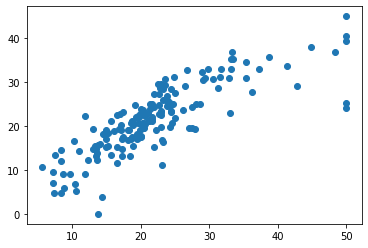

In [148]:
plt.scatter(y_test,predictions)

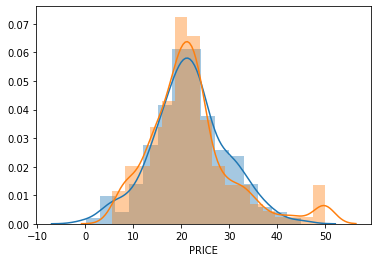

In [153]:
sns.distplot(predictions)
sns.distplot(y_test)

In [0]:
from sklearn import metrics

In [143]:
metrics.mean_absolute_error(y_test,predictions)

3.544415228430734

In [144]:
metrics.mean_squared_error(y_test,predictions)

26.203377464160756

In [147]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

5.11892346730841